## **Submission from Group H:**
* JUAN LUIS BETANCUR BOTERO, 
* MANUEL MARINA HERRERA, 
* ALICE SEYNAEVE, 
* KRISHNA AGRAWAL, 
* ALI ELMONOFY , 
* THOMAS AUGUST MARIA STENGER, 
* ANTOINE DE MAINTENANT

# Summary
The goal of this assignment is to Predict the total number of Washington D.C. bicycle users on an hourly basis using a dataset (use attached `hour.csv`, and have a look at `README.txt` for explanations)
 with data from 2011 and 2012. The notebook shold be divided in the following sections: 1) EDA; 2) Data Engineering; 3) ML Models

# Sections
* **[Imports](#0)**
* **[Reading Data](#0.1)**
######
* **[Part 1: Exploratory Data Analysis](#1)**
  * *[1.1 Ensuring data quality](#1.1)*  
  * *[1.2 Plotting clear and meaningful figures](#1.2)*
  * *[1.3 Checking possibly redundant variables via correlations](#1.3)*
  * *[1.4  Giving insights on what seems relevant for prediction and what does not](#1.4)*
######
* **[Part 2: Data Engineering](#2)**
  * *[2.1. Treatment of text and date features](#2.1)*  
  * *[2.2. Generation of extra features and studying the influence of combinations of features](#2.2)* 
  * *[2.3. Giving new insights on what seems relevant for prediction and what does not](#2.3)* 
  * *[2.4. Discussion on missing values and outliers](#2.4)* 
  * *[2.5. Use of scikit-learn pipelines to perform transformations](#2.5)*
######
* **[Part 3: Machine Learning](#3.)**
  * *[3.1 Choosing sensible models (linear and non-linear)](#3.1)*
      * *[3.1.a Baseline Linear Regression with Initial Variables](#3.1.a)*
      * *[3.1.b Linear Regression with New Variables](#3.1.b)*
      * *[3.1.c Baseline Random Forest](#3.1.c)*
  * *[3.2 Tuning model parameters with validation](#3.2)*
  * *[3.3 Obtaining accurate predictions in test](#3.3)*
  * *[3.4 Plotting predictions vs reality for additional insights](#3.4)*

<a id='0'></a>
## Importing all libraries/modules used in this notebook:

In [1]:
import calendar
import datetime as dt
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from datetime import date
from functools import reduce
from sklearn import preprocessing
from sklearn import datasets
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_diabetes
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from textwrap import wrap

In [2]:
warnings.filterwarnings("ignore")

In [3]:
pd.set_option( "display.max_columns", None,'display.max_colwidth', None)

<a id='0.1'></a>
## Reading the Data

In [4]:
data = pd.read_csv("hour.csv")
data.head()

,instant,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [5]:
data.rename(columns={'instant':'record_id','dteday':'date', 'hr':'hour','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_rentals', "temp":"temperature", "atemp":"atemperature"},inplace=True)

data = data.set_index('record_id')
data['date'] = pd.to_datetime(data["date"])
data

,date,hour,weather_condition,temperature,atemperature,humidity,windspeed,casual,registered,total_rentals
record_id,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,19,"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,20,"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90


<a id='1'></a>
# **Part 1: Exploratory Data Analysis**

<a id='1.1'></a>
## 1.1. Ensuring data quality

In [6]:
data.shape

(17379, 10)

In [7]:
data.size

173790

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               17379 non-null  datetime64[ns]
 1   hour               17379 non-null  int64         
 2   weather_condition  17279 non-null  object        
 3   temperature        17280 non-null  float64       
 4   atemperature       17279 non-null  float64       
 5   humidity           17279 non-null  float64       
 6   windspeed          17279 non-null  float64       
 7   casual             17379 non-null  int64         
 8   registered         17379 non-null  int64         
 9   total_rentals      17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 1.5+ MB


In [9]:
# Checking missing values for the dataset
data.isnull().sum()

date                   0
hour                   0
weather_condition    100
temperature           99
atemperature         100
humidity             100
windspeed            100
casual                 0
registered             0
total_rentals          0
dtype: int64

In [10]:
# Quick general overview of our different variables before seperating them by year
data.describe()

,hour,temperature,atemperature,humidity,windspeed,casual,registered,total_rentals
count,17379.000000,17280.000000,17279.000000,17279.000000,17279.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.497071,0.475530,0.627235,0.190114,35.676218,153.786869,189.463088
std,6.914405,0.192474,0.171782,0.193047,0.122378,49.305030,151.357286,181.387599
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
data[data["date"].dt.year == 2011].describe()

,hour,temperature,atemperature,humidity,windspeed,casual,registered,total_rentals
count,8645.000000,8591.000000,8597.000000,8594.000000,8595.000000,8645.000000,8645.000000,8645.000000
mean,11.573626,0.488949,0.468616,0.643606,0.191121,28.600578,115.193869,143.794448
std,6.907822,0.197980,0.176692,0.196433,0.123218,38.840789,109.461014,133.797854
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.320000,0.318200,0.490000,0.104500,3.000000,26.000000,31.000000
50%,12.000000,0.500000,0.484800,0.650000,0.194000,14.000000,90.000000,109.000000
75%,18.000000,0.660000,0.621200,0.810000,0.283600,38.000000,168.000000,211.000000
max,23.000000,0.960000,1.000000,1.000000,0.850700,272.000000,567.000000,651.000000


In [12]:
data[data["date"].dt.year == 2012].describe()

,hour,temperature,atemperature,humidity,windspeed,casual,registered,total_rentals
count,8734.000000,8689.000000,8682.000000,8685.000000,8684.000000,8734.000000,8734.000000,8734.000000
mean,11.520151,0.505101,0.482376,0.611036,0.189117,42.679757,191.986604,234.666361
std,6.921208,0.186535,0.166506,0.188251,0.121539,56.970413,175.481637,208.910941
min,0.000000,0.020000,0.015200,0.160000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.333300,0.460000,0.104500,5.000000,46.000000,53.000000
50%,12.000000,0.520000,0.484800,0.610000,0.164200,20.000000,156.000000,191.000000
75%,18.000000,0.660000,0.621200,0.770000,0.253700,60.000000,275.000000,347.000000
max,23.000000,1.000000,0.924200,1.000000,0.806000,367.000000,886.000000,977.000000


In [13]:
# One insight of this overview is that the bike rental service has enjoyed increasing popularity and user numbers!

<a id='1.2'></a>
## 1.2. Plotting clear and meaningful figures

Text(0, 0.5, 'Number of Rides')

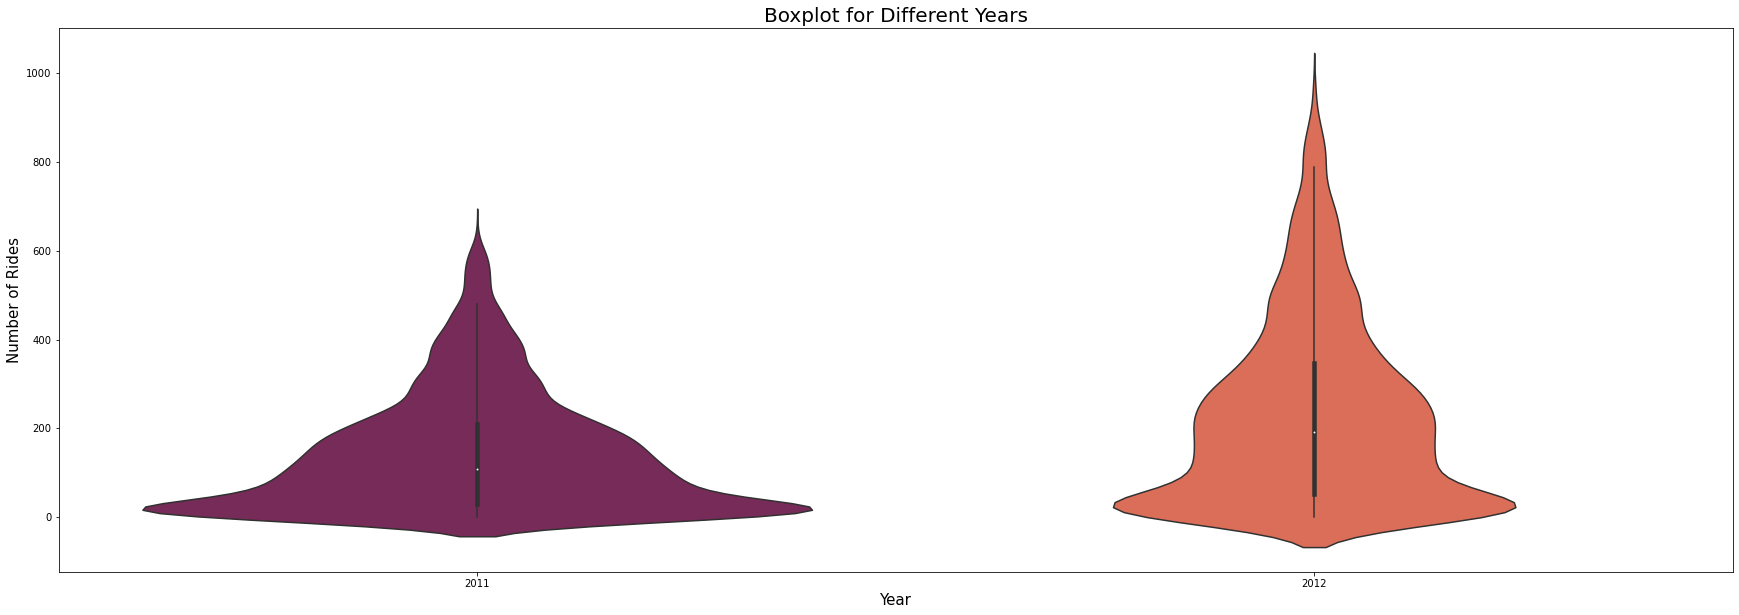

In [14]:
# Total number of rides by year (distribution according to total_rentals per hour) - visually showing increased popularity/user numbers!
fig, (graph1) = plt.subplots(ncols=1, figsize=(30, 10))

sns.violinplot(x=data["date"].dt.year, y="total_rentals", data=data, ax=graph1, palette="rocket")
graph1.set_title("Boxplot for Different Years",fontsize = 20)
graph1.set_xlabel("Year" , fontsize = 15)
graph1.set_ylabel("Number of Rides" , fontsize = 15)

Text(0, 0.5, 'Number of Rides')

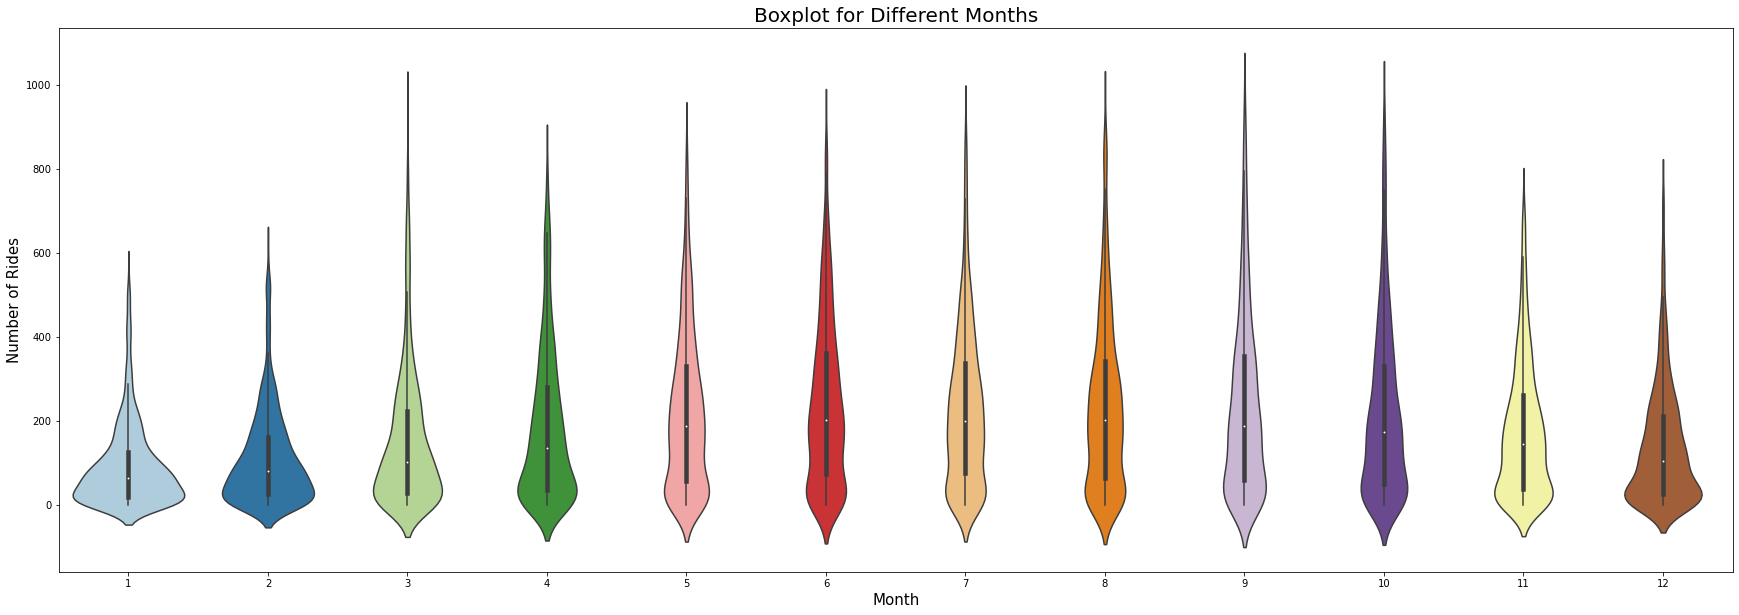

In [15]:
# Total number of rides by month (distribution according to total_rentals per hour)
fig, (graph1) = plt.subplots(ncols=1, figsize=(30, 10))

sns.violinplot(x=data["date"].dt.month, y="total_rentals", data=data, ax=graph1, palette="Paired")
graph1.set_title("Boxplot for Different Months",fontsize = 20)
graph1.set_xlabel("Month" , fontsize = 15)
graph1.set_ylabel("Number of Rides" , fontsize = 15)

Text(0, 0.5, 'Number of Rides')

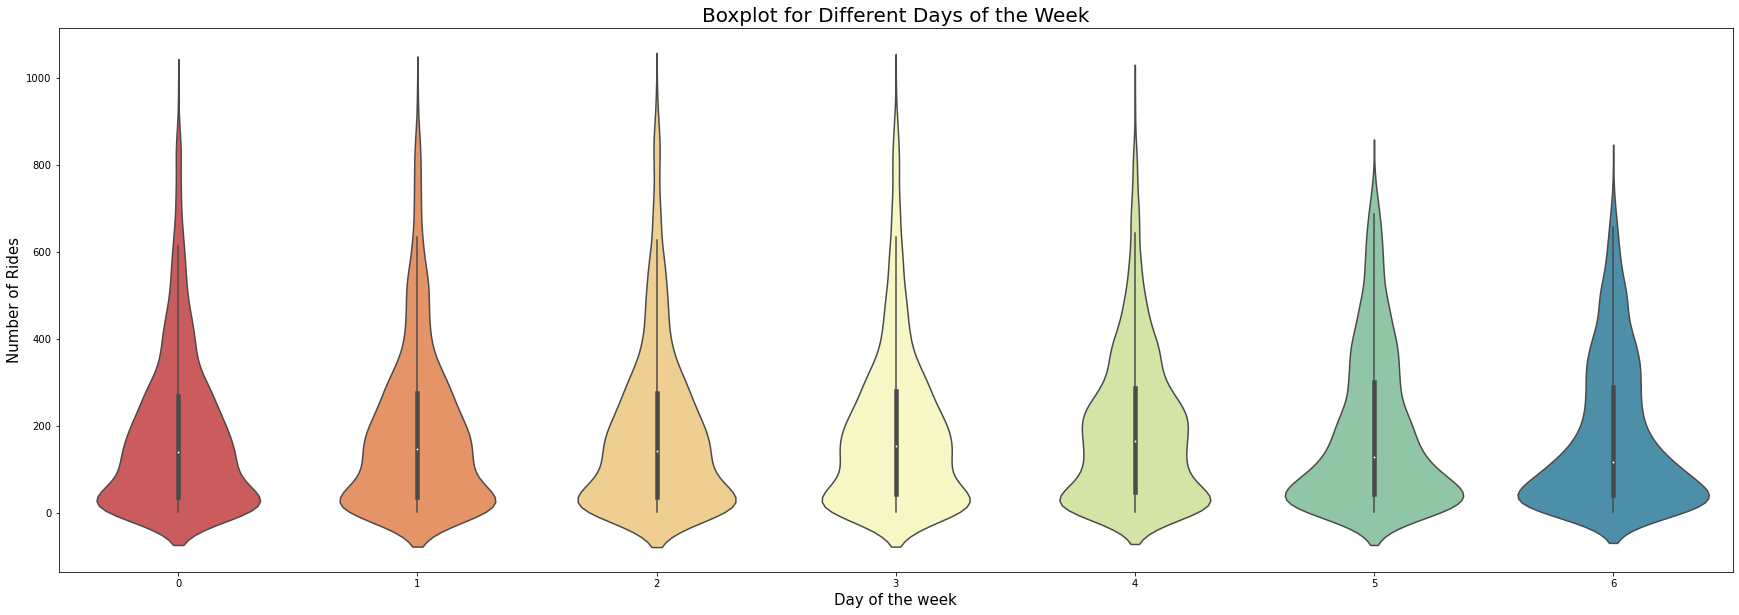

In [16]:
# Total number of rides by day of the week (distribution according to total_rentals per hour)
fig, (graph1) = plt.subplots(ncols=1, figsize=(30, 10))

sns.violinplot(x=data["date"].dt.weekday, y="total_rentals", data=data, ax=graph1, palette="Spectral")
graph1.set_title("Boxplot for Different Days of the Week",fontsize = 20)
graph1.set_xlabel("Day of the week" , fontsize = 15)
graph1.set_ylabel("Number of Rides" , fontsize = 15)

Text(0, 0.5, 'Number of Rides')

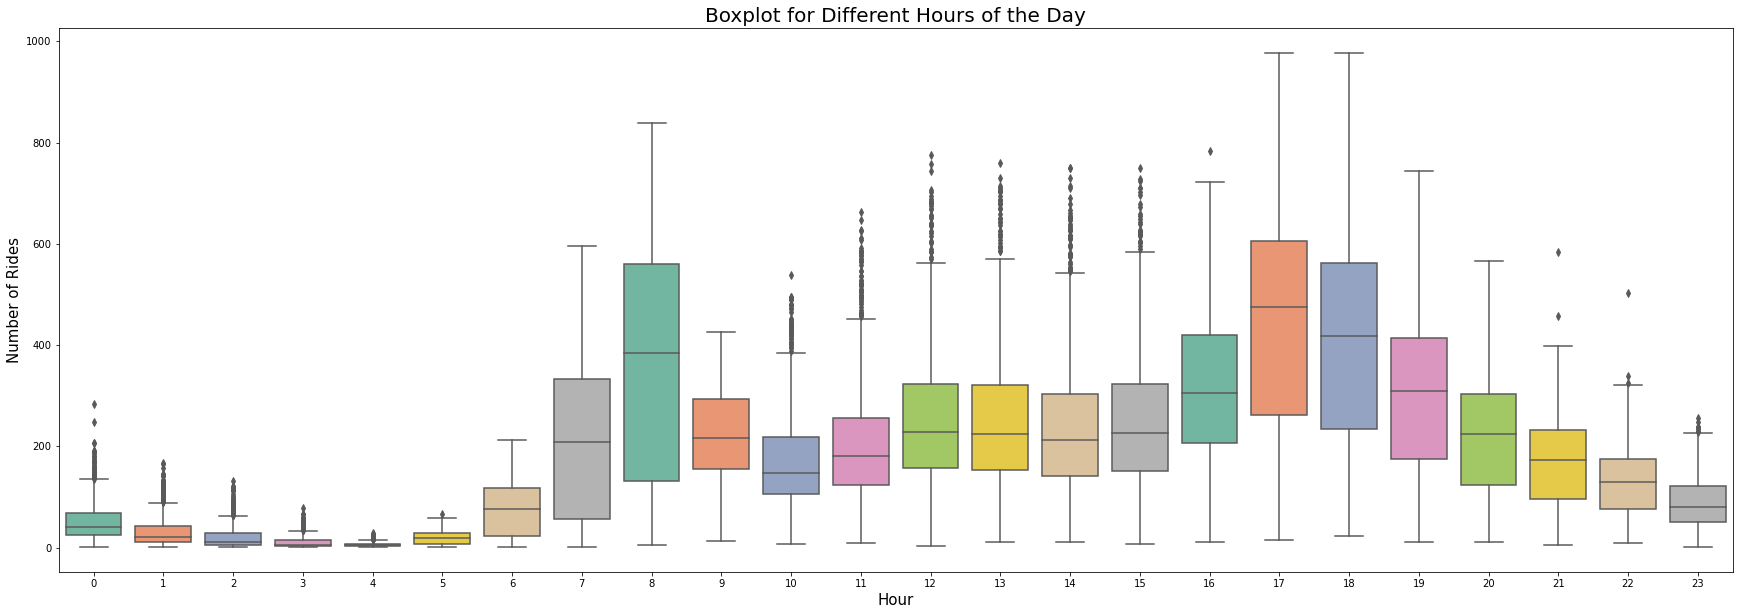

In [17]:
# Total number of rides by hour of day
fig, (graph1) = plt.subplots(ncols=1, figsize=(30, 10))

sns.boxplot(x = "hour", y = "total_rentals", data=data, palette = "Set2")
graph1.set_title("Boxplot for Different Hours of the Day",fontsize = 20)
graph1.set_xlabel("Hour" , fontsize = 15)
graph1.set_ylabel("Number of Rides" , fontsize = 15)

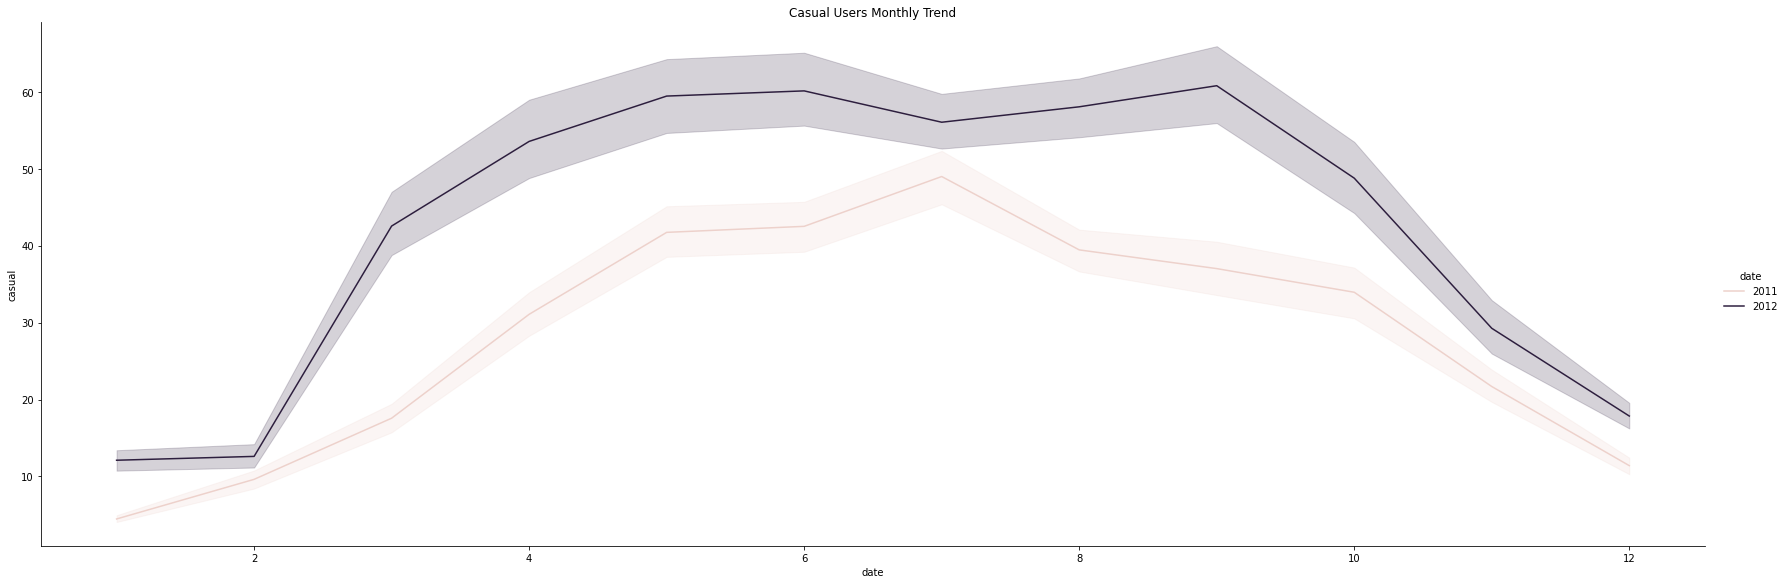

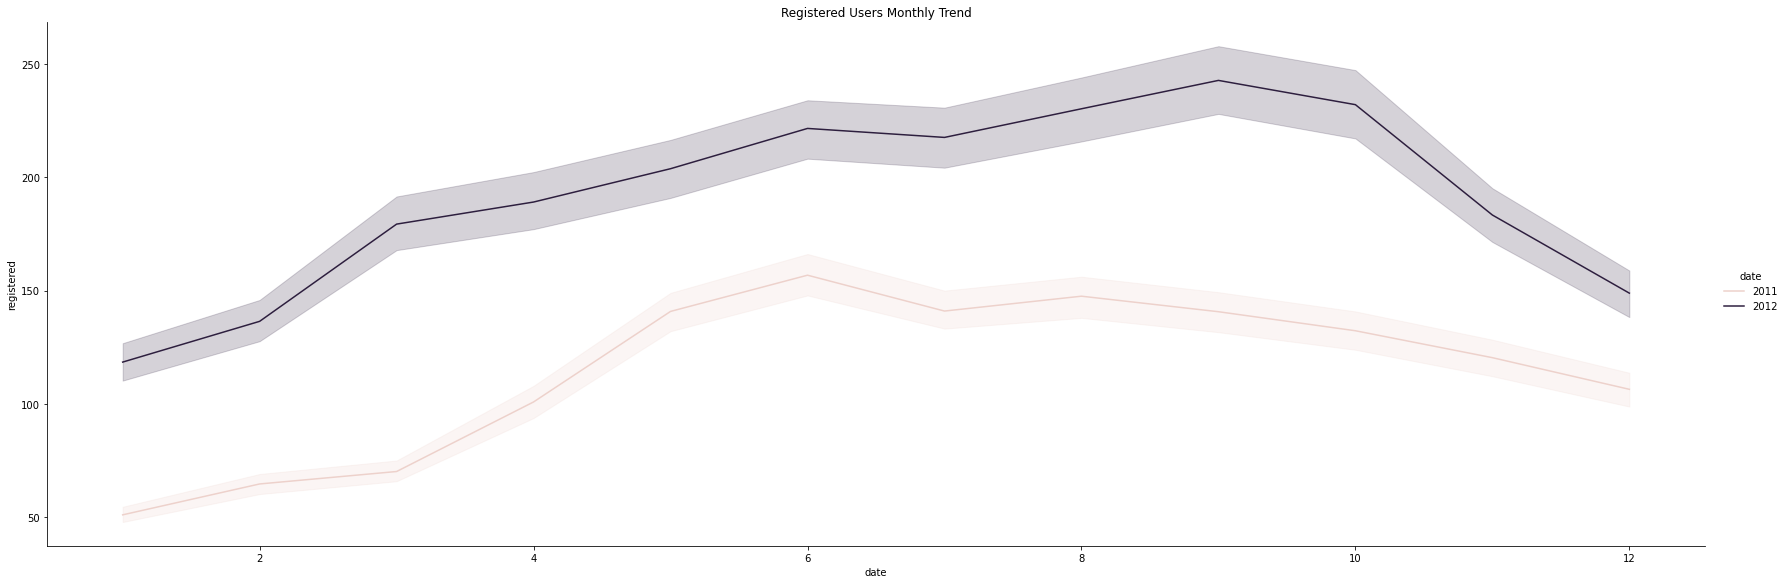

In [18]:
# Casual and Registered Rides Monthly for Different Years
sns.relplot(x=data["date"].dt.month, y="casual", hue=data["date"].dt.year, dashes=False, markers=True, kind="line", height = 8, aspect = 3, data=data).set(title="Casual Users Monthly Trend")
sns.relplot(x=data["date"].dt.month, y="registered", hue=data["date"].dt.year, dashes=False, markers=True, kind="line", height = 8, aspect = 3, data=data).set(title="Registered Users Monthly Trend")

Text(0, 0.5, 'Number of Rides')

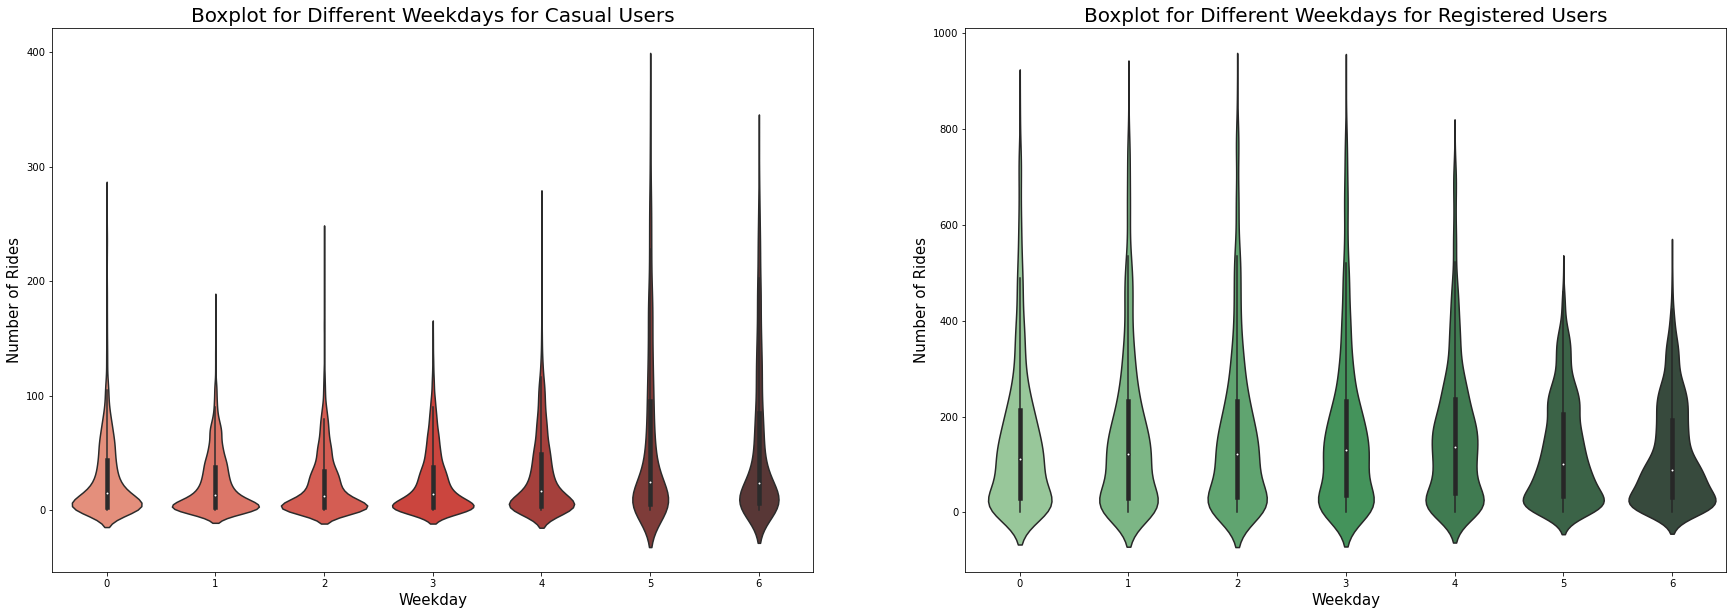

In [19]:
# Total number of rides by weekday by casual and registered
fig, (graph1, graph2) = plt.subplots(ncols=2, figsize=(30, 10))

sns.violinplot(x=data["date"].dt.weekday, y="casual", data=data, ax=graph1, palette="Reds_d")
graph1.set_title("Boxplot for Different Weekdays for Casual Users",fontsize = 20)
graph1.set_xlabel("Weekday" , fontsize = 15)
graph1.set_ylabel("Number of Rides" , fontsize = 15)

sns.violinplot(x=data["date"].dt.weekday, y="registered", data=data, ax=graph2, palette="Greens_d")
graph2.set_title("Boxplot for Different Weekdays for Registered Users",fontsize = 20)
graph2.set_xlabel("Weekday" , fontsize = 15)
graph2.set_ylabel("Number of Rides" , fontsize = 15)

Text(0, 0.5, 'Number of Rides')

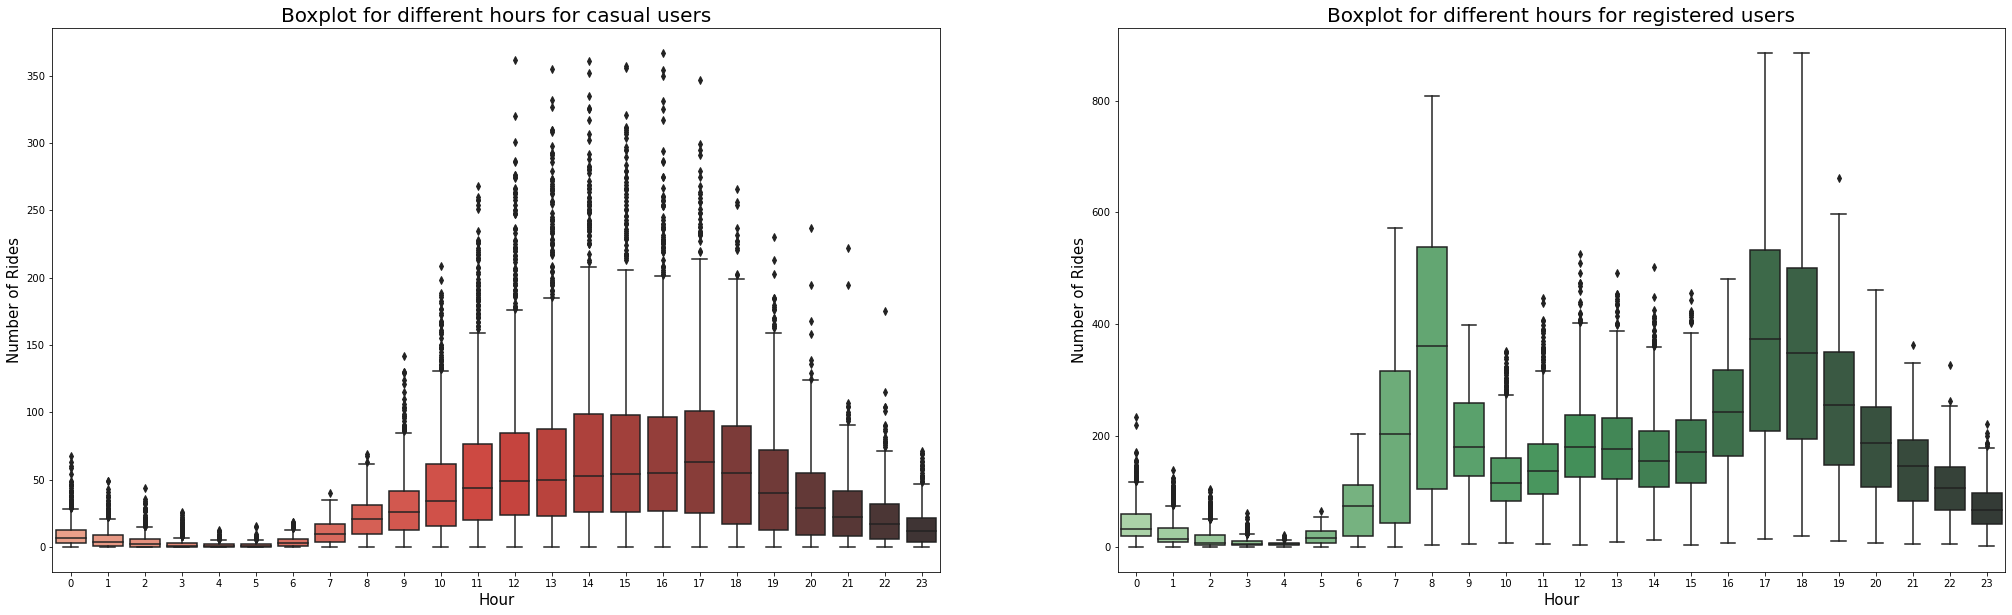

In [20]:
# Total number of rides by hour of day for casual and registered
fig, (graph1, graph2) = plt.subplots(ncols=2, figsize=(35, 10))

sns.boxplot(x="hour", y="casual", data=data, ax=graph1, palette="Reds_d")
graph1.set_title("Boxplot for different hours for casual users",fontsize = 20)
graph1.set_xlabel("Hour" , fontsize = 15)
graph1.set_ylabel("Number of Rides" , fontsize = 15)

sns.boxplot(x="hour", y="registered", data=data, ax=graph2, palette="Greens_d")
graph2.set_title("Boxplot for different hours for registered users",fontsize = 20)
graph2.set_xlabel("Hour" , fontsize = 15)
graph2.set_ylabel("Number of Rides" , fontsize = 15)

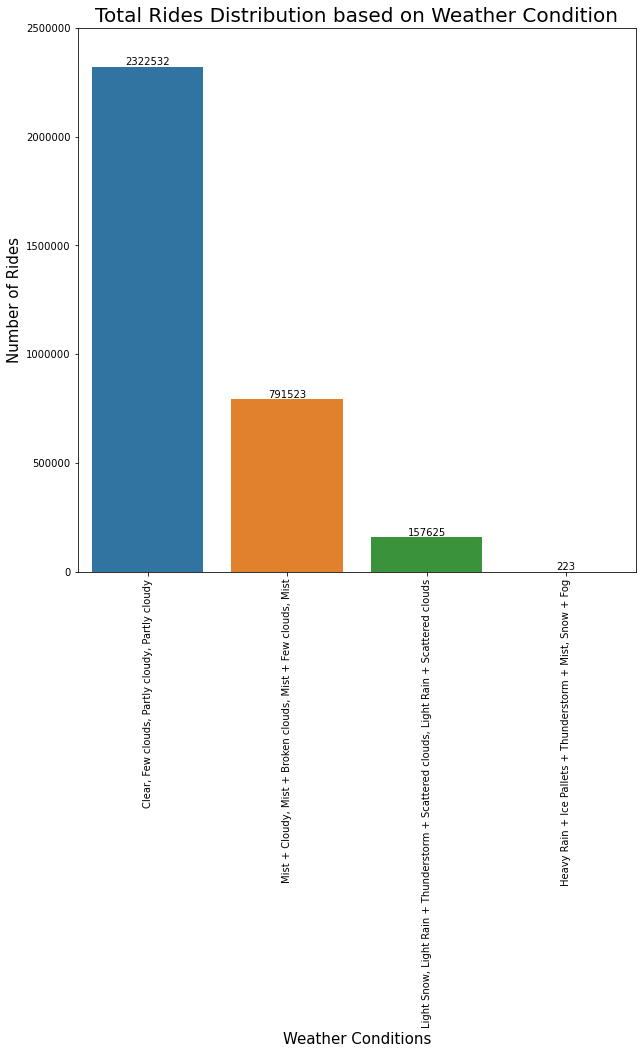

In [21]:
# Total Rides distribution based on Weather condition
fig,ax1=plt.subplots(figsize=(10,10))

#Bar plot for weather_condition distribution of number of rides
sns.barplot(x='weather_condition',y='total_rentals', data= 
            data.groupby("weather_condition", as_index=False).sum().sort_values("total_rentals", ascending=False),ax=ax1)
ax1.set_title('Total Rides Distribution based on Weather Condition', fontsize = 20)
ax1.set_xlabel("Weather Conditions" , fontsize = 15)
ax1.set_ylabel("Number of Rides" , fontsize = 15)
ax1.tick_params(axis='x',labelsize=10, labelrotation=90)
ax1.set_ylim([0,2500000])
ax1.yaxis.get_major_formatter().set_scientific(False)
ax1.bar_label(ax1.containers[0], fmt = '%d')
plt.show()

Text(0.5, 1.0, 'Distribution of aTemperature')

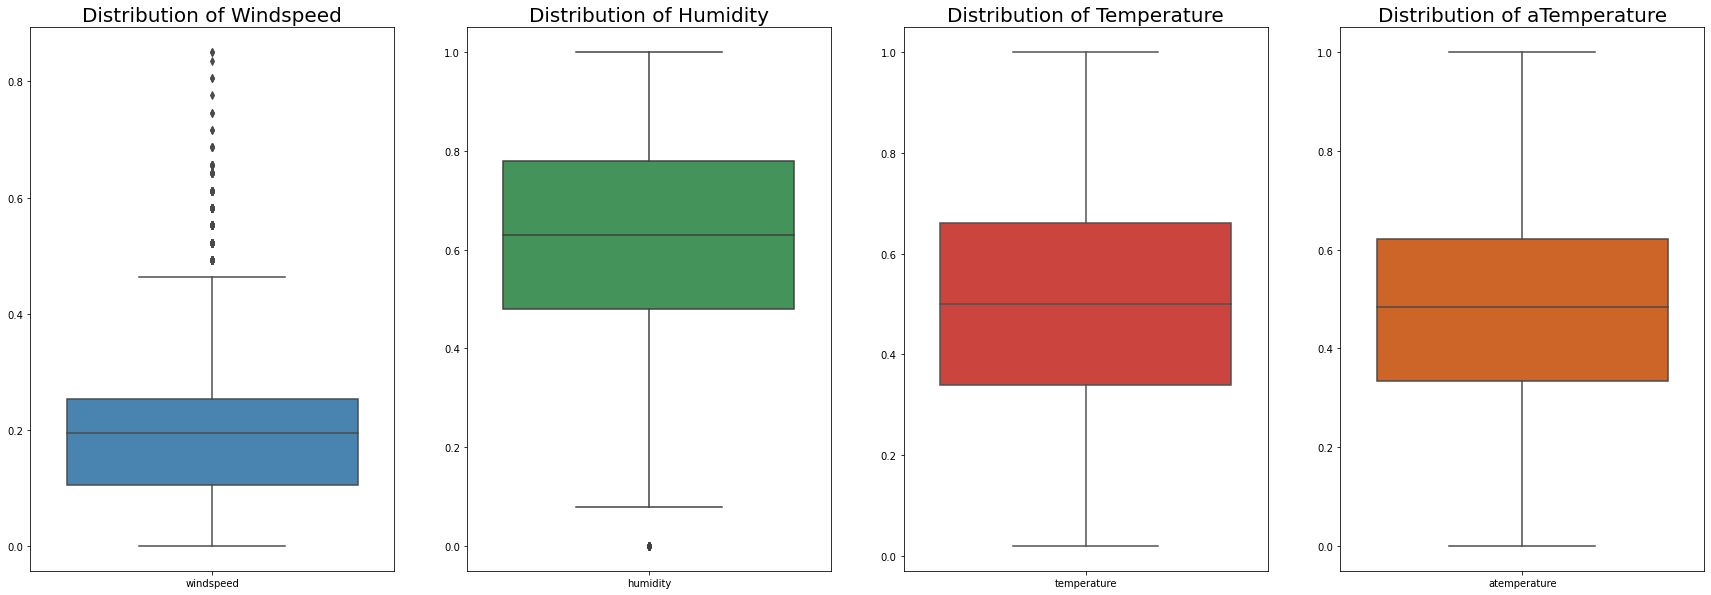

In [22]:
# Handling outliers - only looking at our numerical explanatory variables (weathersit, temp, hum - we already know we will drop atemp later due to corr w/ temp) :

fig, (graph1, graph2, graph3, graph4) = plt.subplots(ncols=4, figsize=(30, 10))

sns.boxplot(data=data[['windspeed']], ax=graph1, palette="Blues_d")
graph1.set_title("Distribution of Windspeed",fontsize = 20)

sns.boxplot(data=data[['humidity']], ax=graph2, palette="Greens_d")
graph2.set_title("Distribution of Humidity",fontsize = 20)

sns.boxplot(data=data[['temperature']], ax=graph3, palette="Reds_d")
graph3.set_title("Distribution of Temperature",fontsize = 20)

sns.boxplot(data=data[['atemperature']], ax=graph4, palette="Oranges_d")
graph4.set_title("Distribution of aTemperature",fontsize = 20)

Text(0.5, 1.0, 'Distribution of Casual Users')

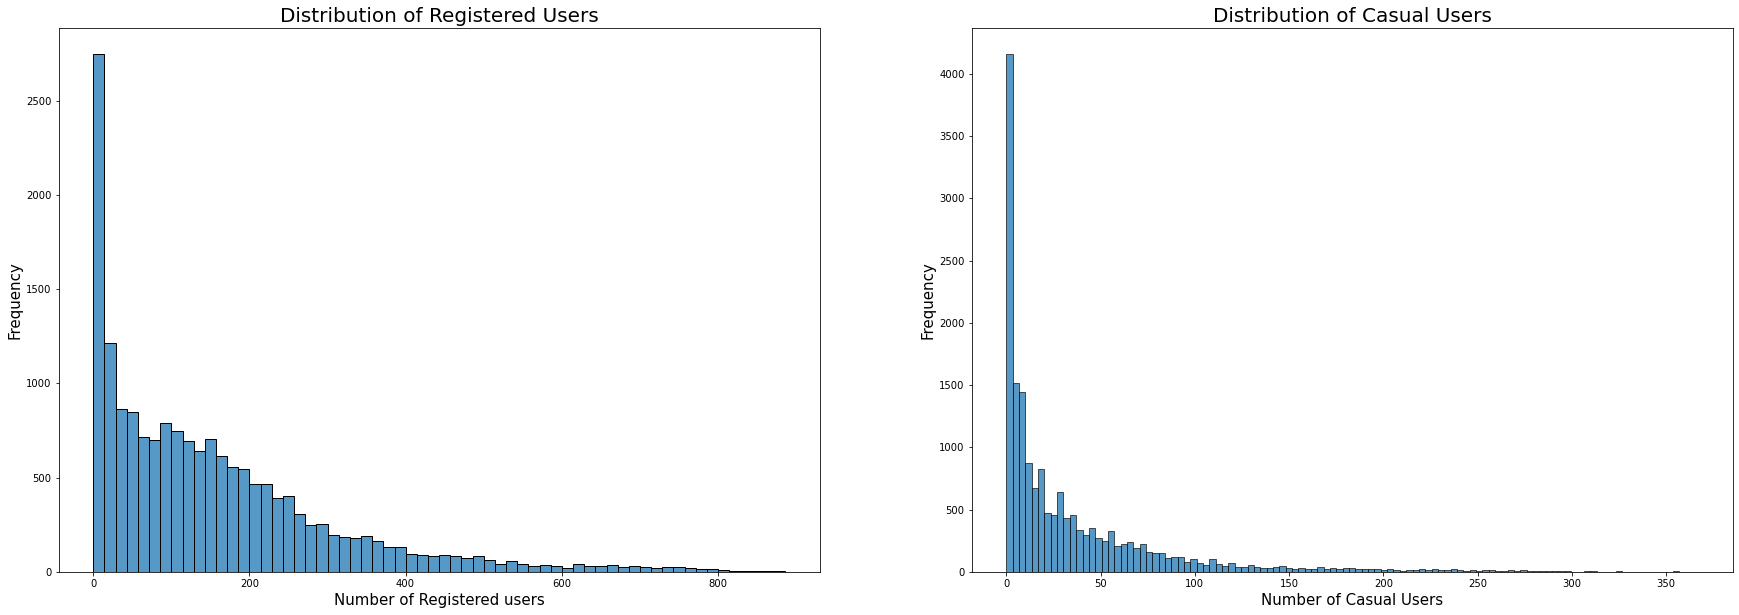

In [23]:
# Distribution of registered/casual users per hour and their frequency
fig, (graph1, graph2) = plt.subplots(ncols=2, figsize=(30, 10))

sns.histplot(data["registered"], ax=graph1)
graph1.set_xlabel("Number of Registered users" , fontsize = 15)
graph1.set_ylabel("Frequency" , fontsize = 15)
graph1.set_title("Distribution of Registered Users",fontsize = 20)

sns.histplot(data["casual"], ax=graph2)
graph2.set_xlabel("Number of Casual Users" , fontsize = 15)
graph2.set_ylabel("Frequency" , fontsize = 15)
graph2.set_title("Distribution of Casual Users",fontsize = 20)

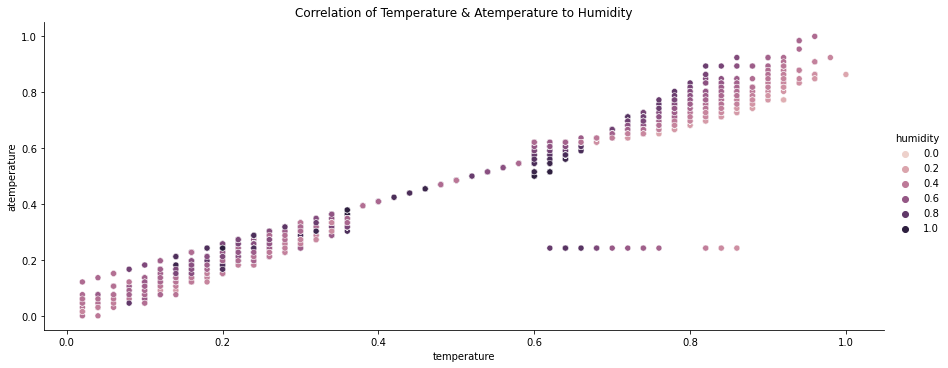

In [24]:
# Different levels of humidity based vs the temperature and atemperature
sns.relplot(
    data=data,
    x="temperature", 
    y="atemperature", 
    hue="humidity",
    height = 5,
    aspect = 2.5).set(title='Correlation of Temperature & Atemperature to Humidity')

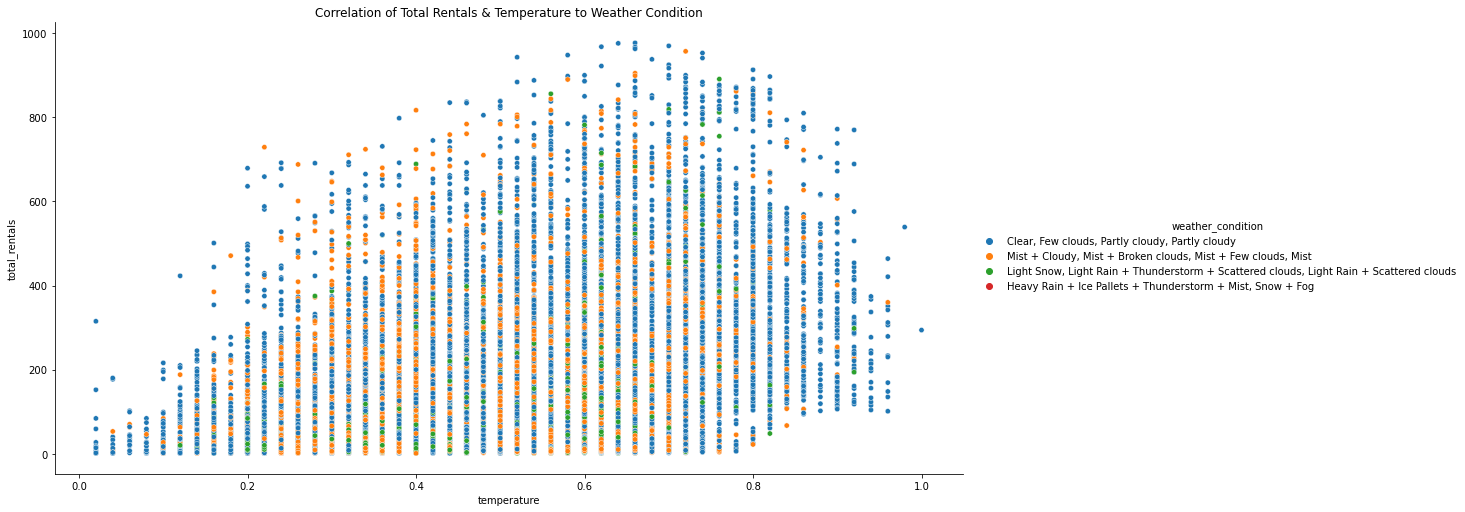

In [25]:
sns.relplot(data=data, x="temperature", y="total_rentals", hue="weather_condition", s =28, height = 7, aspect = 2).set(title='Correlation of Total Rentals & Temperature to Weather Condition')

<a id='1.3'></a>
## 1.3. Checking possibly redundant variables via correlations

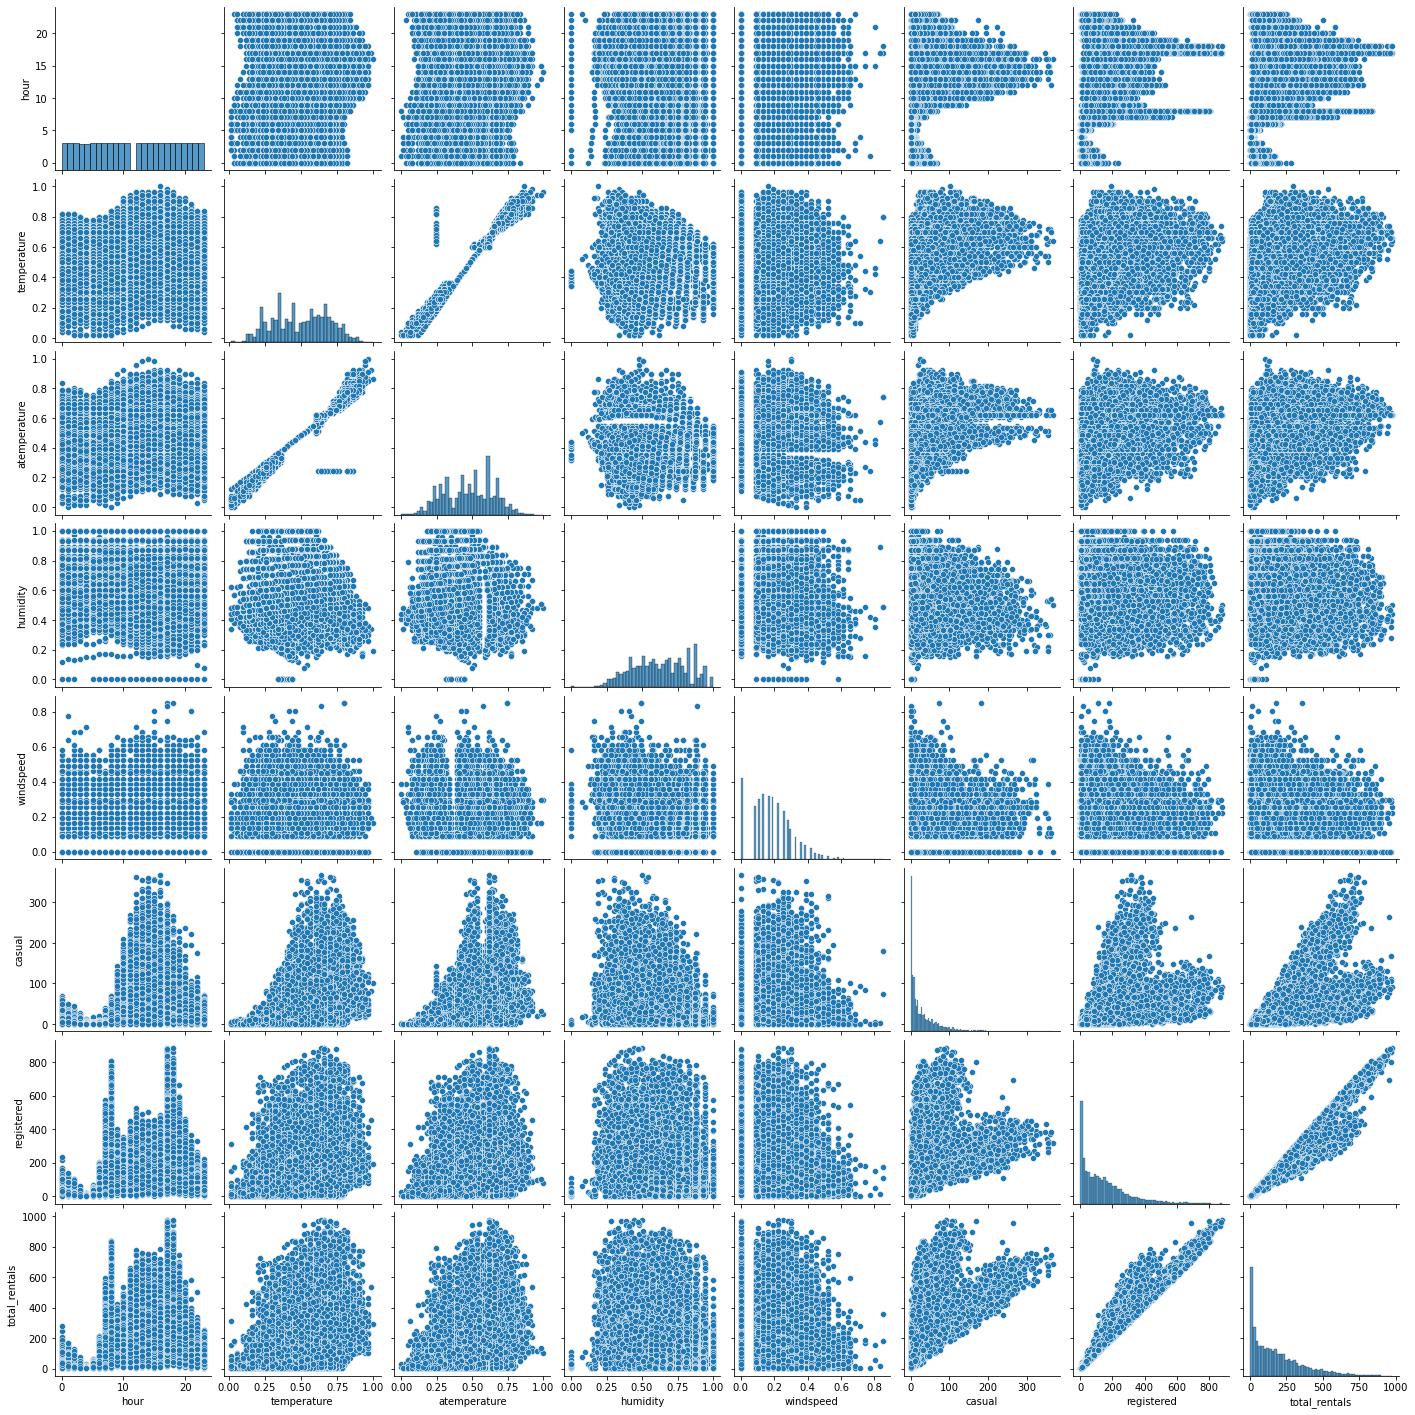

In [26]:
sns.pairplot(data)

In [27]:
data.corr()

,hour,temperature,atemperature,humidity,windspeed,casual,registered,total_rentals
hour,1.000000,0.136511,0.133510,-0.276465,0.137523,0.301202,0.374141,0.394071
temperature,0.136511,1.000000,0.987600,-0.069513,-0.023297,0.459860,0.335735,0.405164
atemperature,0.133510,0.987600,1.000000,-0.052123,-0.062761,0.453949,0.332708,0.401031
humidity,-0.276465,-0.069513,-0.052123,1.000000,-0.289951,-0.346858,-0.274069,-0.323022
windspeed,0.137523,-0.023297,-0.062761,-0.289951,1.000000,0.090390,0.082854,0.093692
casual,0.301202,0.459860,0.453949,-0.346858,0.090390,1.000000,0.506618,0.694564
registered,0.374141,0.335735,0.332708,-0.274069,0.082854,0.506618,1.000000,0.972151
total_rentals,0.394071,0.405164,0.401031,-0.323022,0.093692,0.694564,0.972151,1.000000


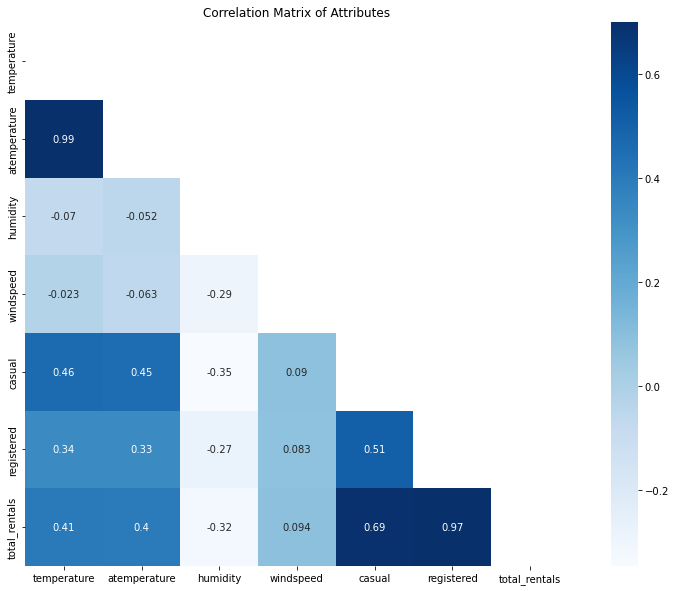

In [28]:
#Create the correlation matrix
features_correlation = data[["temperature","atemperature","humidity","windspeed","casual","registered","total_rentals"]].corr()
mask = np.zeros_like(features_correlation)
mask[np.triu_indices_from(mask)] = True

#Heat map for correlation matrix of attributes
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(features_correlation, cmap="Blues", annot=True, mask=mask, vmax=.7, square=True)
ax.set_title('Correlation Matrix of Attributes')
plt.show()

In [29]:
data.corr()[["total_rentals"]].sort_values("total_rentals")

,total_rentals
humidity,-0.323022
windspeed,0.093692
hour,0.394071
atemperature,0.401031
temperature,0.405164
casual,0.694564
registered,0.972151
total_rentals,1.000000


<a id='1.4'></a>
## 1.4. Giving insights on what seems relevant for prediction and what does not

There is a high correlation between the following features:
* temperature and atemperature
* registered and total_rentals
* casual and total_rentals

Some of the variables we can ignore when predicting will be:
* atemperature
* casual
* registered

<a id='2'></a>
# **Part 2: Data Engineering**

<a id='2.1'></a>
## 2.1. Treatment of text and date features

In [30]:
# copying original data in new df for comparison/security
prep_data = data.copy()

In [31]:
# Extract further time-related features
prep_data["day"] = prep_data["date"].dt.day
prep_data["weekday"] = prep_data["date"].dt.weekday
prep_data["week"] = prep_data["date"].dt.isocalendar().week
prep_data["month"] = prep_data["date"].dt.month
prep_data["year"] = prep_data["date"].dt.year

prep_data["weekend"] = prep_data["weekday"].map(lambda x: 1*(x>4))

# hour can be used to create new column for labeling (day/night)
prep_data["day_period"] = pd.cut(
    prep_data["hour"], 
    bins=[0, 6, 12, 18, 24],
    include_lowest=True,
    labels=["night", "morning", "afternoon", "evening"]
)

# season information for labeling - using for loop instead of cut/binning since month 12 & 1 & 2 belong to winter: 
season = []

for month in list(prep_data["month"]):
    if month == 3 or month == 4 or month == 5:
        season.append("spring")
        
    elif month == 6 or month == 7 or month == 8:
        season.append("summer")
        
    elif month == 9 or month == 10 or month == 11:
        season.append("fall")
    
    else:
        season.append("winter")
        
prep_data["season"] = season

prep_data.head()

,date,hour,weather_condition,temperature,atemperature,humidity,windspeed,casual,registered,total_rentals,day,weekday,week,month,year,weekend,day_period,season
record_id,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16,1,5,52,1,2011,1,night,winter
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40,1,5,52,1,2011,1,night,winter
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32,1,5,52,1,2011,1,night,winter
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13,1,5,52,1,2011,1,night,winter
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1,1,5,52,1,2011,1,night,winter


In [32]:
data_per_day_period = prep_data.groupby(["day_period"], as_index=False).mean()
data_per_day_period[["day_period","casual","registered","total_rentals"]]

,day_period,casual,registered,total_rentals
0,night,4.457508,27.864227,32.321736
1,morning,39.662847,197.926198,237.589044
2,afternoon,71.990400,252.146743,324.137143
3,evening,30.142308,155.664560,185.806868


In [33]:
# weathersit needs to be looked at further - what transformation makes sense?
# 4 different status for weather sit --> seems to be broader buckets from good weather ----> bad weather 
prep_data.weather_condition.unique()

array(['Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       nan, 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'],
      dtype=object)

In [34]:
# transforming weather_condition from text to category [1-4] while keeping nan:

weather_condition_items = list(prep_data["weather_condition"].unique())
weather_condition = []

for item in list(prep_data["weather_condition"]):
    if item == weather_condition_items[0]:
        weather_condition.append("1")
        
    elif item == weather_condition_items[1]:
        weather_condition.append("2")
        
    elif item == weather_condition_items[2]:
        weather_condition.append("3")
        
    elif item == weather_condition_items[-1]:
        weather_condition.append("4")
        
    else:
        weather_condition.append(None)

        
prep_data["weather_condition"] = weather_condition

<a id='2.2'></a>
## 2.2. Generation of extra features and studying the influence of combinations of features

In [35]:
prep_data['dew_point'] = data.humidity**(1/8) * (112+0.9*data.temperature) + 0.1*data.temperature - 112
prep_data['mean_temperature_humidity'] = ( data.temperature + data.humidity ) / 2
prep_data['mean_temperature_windspeed'] = ( data.temperature + data.windspeed ) / 2
prep_data['mean_humidity_windspeed'] = ( data.humidity + data.windspeed ) / 2
prep_data['mean_humidity_windspeed_temperature'] = ( data.humidity + data.windspeed + data.temperature) / 3

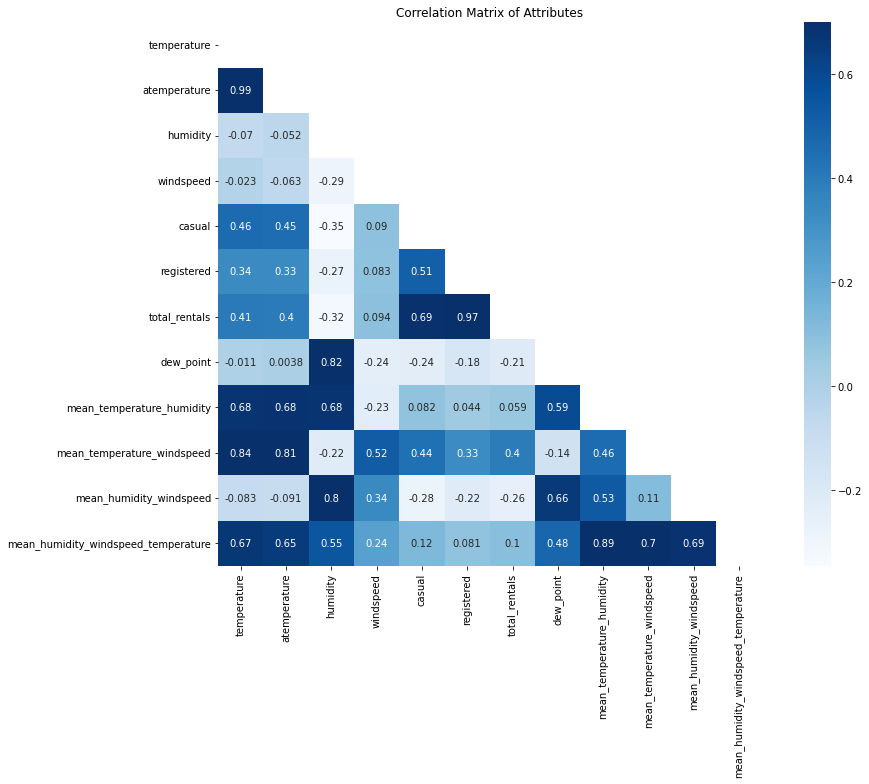

In [36]:
#Create the correlation matrix
features_correlation_2 = prep_data[["temperature","atemperature","humidity","windspeed","casual","registered","total_rentals", 'dew_point', 'mean_temperature_humidity', 'mean_temperature_windspeed', 'mean_humidity_windspeed','mean_humidity_windspeed_temperature']].corr()
mask = np.zeros_like(features_correlation_2)
mask[np.triu_indices_from(mask)] = True

#Heat map for correlation matrix of attributes
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(features_correlation_2, cmap="Blues", annot=True, mask=mask, vmax=.7, square=True)
ax.set_title('Correlation Matrix of Attributes')
plt.show()

<a id='2.3'></a>
## 2.3. Giving new insights on what seems relevant for prediction and what does not

In [37]:
prep_data.columns

Index(['date', 'hour', 'weather_condition', 'temperature', 'atemperature',
       'humidity', 'windspeed', 'casual', 'registered', 'total_rentals', 'day',
       'weekday', 'week', 'month', 'year', 'weekend', 'day_period', 'season',
       'dew_point', 'mean_temperature_humidity', 'mean_temperature_windspeed',
       'mean_humidity_windspeed', 'mean_humidity_windspeed_temperature'],
      dtype='object')

In [38]:
# Time to seperate our dataset into explanatory features and target features
# Since registered and casual users columns are parts of our target cnt we remove them from the dataset 
# We also drop atemp since it is highly correlated with temp (0.99 - see heatmap above), thus, containing same info
# We will also drop the new features we crated since they didn't seem to have any correlation to the rest of the variables

x = prep_data.copy().drop(["total_rentals","casual","registered","atemperature", 'dew_point', 'mean_temperature_humidity', 'mean_temperature_windspeed', 'mean_humidity_windspeed','mean_humidity_windspeed_temperature'], axis=1)
y = prep_data.loc[:, "total_rentals"]

In [39]:
x.head()

,date,hour,weather_condition,temperature,humidity,windspeed,day,weekday,week,month,year,weekend,day_period,season
record_id,,,,,,,,,,,,,,
1,2011-01-01,0,1,0.24,0.81,0.0,1,5,52,1,2011,1,night,winter
2,2011-01-01,1,1,0.22,0.80,0.0,1,5,52,1,2011,1,night,winter
3,2011-01-01,2,1,0.22,0.80,0.0,1,5,52,1,2011,1,night,winter
4,2011-01-01,3,1,0.24,0.75,0.0,1,5,52,1,2011,1,night,winter
5,2011-01-01,4,1,0.24,0.75,0.0,1,5,52,1,2011,1,night,winter


In [40]:
y.head()

record_id
1    16
2    40
3    32
4    13
5     1
Name: total_rentals, dtype: int64

<a id='2.4'></a>
## 2.4. Discussion on missing values and outliers

In [41]:
# for better data handling we already implement split for train & test data so to just handle outliers in train set
# Requirement: training set to be whole 2011 & first 3 qs of 2012 & 
# Test date being 4th q of 2012 --> defining this manually here instead of using train_test_split from sklearn

x_train = x[x["date"]<"2012-10-01"] 
x_test = x[x["date"]>="2012-10-01"]
y_train = y.iloc[0:len(x_train)]
y_test = y.iloc[len(x_train):]

In [42]:
### IQR Outlier Capping Method:

outlier_df = x_train.describe()

def outlier_function(df, col_name):
    first_quartile = outlier_df[col_name][4]
    third_quartile = outlier_df[col_name][6]
    IQR = third_quartile - first_quartile
    upper_limit = third_quartile+(1.5*IQR)
    lower_limit = first_quartile-(1.5*IQR)
    #Counting
    outlier_count = len(df[(df[col_name]>upper_limit) | (df[col_name]<lower_limit)])
    return lower_limit, upper_limit, outlier_count


In [43]:
numeric = ["windspeed", "temperature", "humidity"]
dic_outliers = {}
for column in numeric:
        print("There are {} outliers in {}".format(outlier_function(x_train, column)[2], column))
        dic_outliers[column] = outlier_function(x_train, column)[:2]


There are 307 outliers in windspeed
There are 0 outliers in temperature
There are 22 outliers in humidity


In [44]:
action = "clip" #choose between clip, drop or nothing
for cols,limits in dic_outliers.items():
    if action == 'drop':
        data = x_train[(x_train[cols]<=limits[1]) & (x_train[cols]>=limits[0])].reset_index()
        data = x_train.drop(columns = ['index'])
    elif action == 'clip':
        x_train.loc[x_train[cols]>limits[1],cols] = limits[1]
        x_train.loc[x_train[cols]<limits[0],cols] = limits[0]

Text(0.5, 1.0, 'Distribution of Temperature')

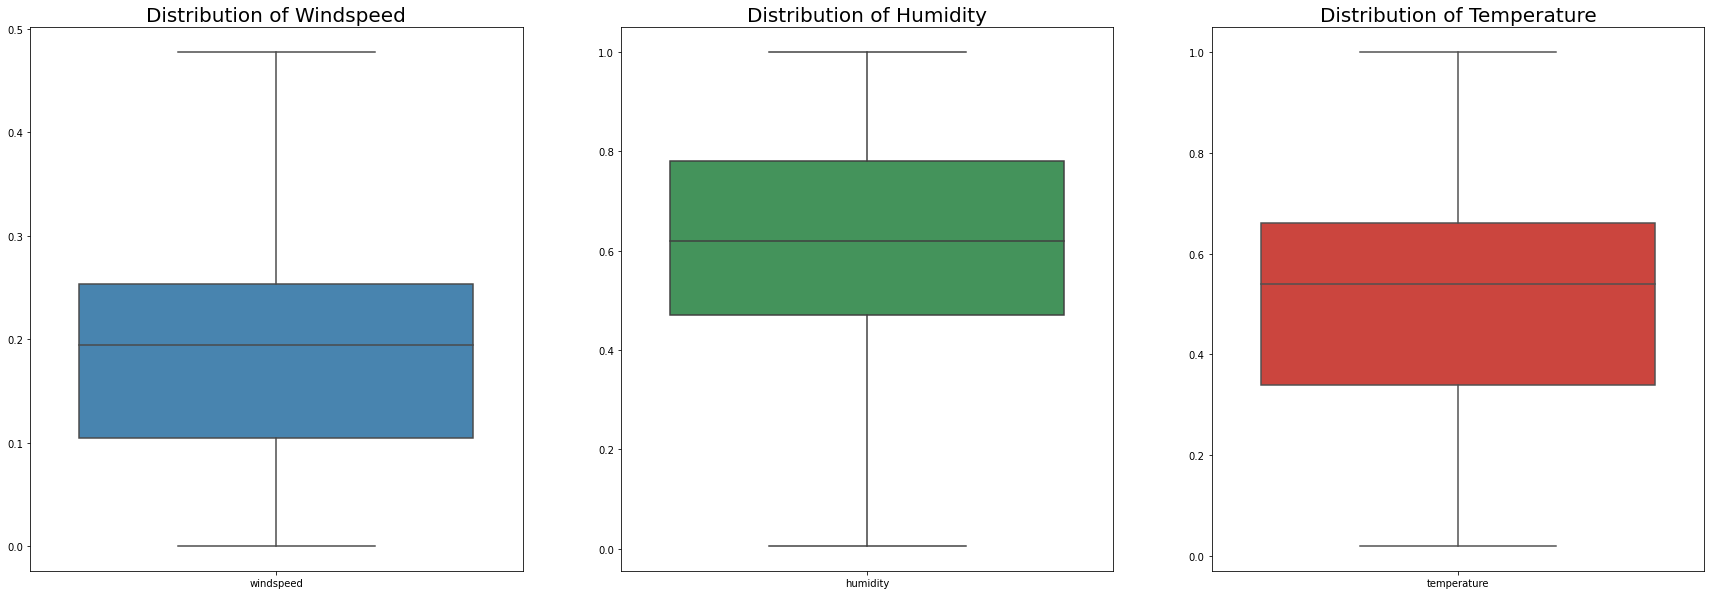

In [45]:
# Handling outliers - only looking at our numerical explanatory variables (weathersit, temp, hum - we already know we will drop atemp later due to corr w/ temp) :

fig, (graph1, graph2, graph3) = plt.subplots(ncols=3, figsize=(30, 10))

sns.boxplot(data=x_train[['windspeed']], ax=graph1, palette="Blues_d")
graph1.set_title("Distribution of Windspeed",fontsize = 20)

sns.boxplot(data=x_train[['humidity']], ax=graph2, palette="Greens_d")
graph2.set_title("Distribution of Humidity",fontsize = 20)

sns.boxplot(data=x_train[['temperature']], ax=graph3, palette="Reds_d")
graph3.set_title("Distribution of Temperature",fontsize = 20)

<a id='2.5'></a>
## 2.5. Use of scikit-learn pipelines to perform transformations

In [46]:
x_train.dtypes

date                 datetime64[ns]
hour                          int64
weather_condition            object
temperature                 float64
humidity                    float64
windspeed                   float64
day                           int64
weekday                       int64
week                         UInt32
month                         int64
year                          int64
weekend                       int64
day_period                 category
season                       object
dtype: object

In [47]:
# casting the relevant columns as categories

categorical_cols = ["day_period", "weekend", "season"]

for col in categorical_cols:
    x_train[col] = x_train[col].astype("category")

In [48]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15211 entries, 1 to 15211
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               15211 non-null  datetime64[ns]
 1   hour               15211 non-null  int64         
 2   weather_condition  15125 non-null  object        
 3   temperature        15122 non-null  float64       
 4   humidity           15122 non-null  float64       
 5   windspeed          15123 non-null  float64       
 6   day                15211 non-null  int64         
 7   weekday            15211 non-null  int64         
 8   week               15211 non-null  UInt32        
 9   month              15211 non-null  int64         
 10  year               15211 non-null  int64         
 11  weekend            15211 non-null  category      
 12  day_period         15211 non-null  category      
 13  season             15211 non-null  category      
dtypes: UIn

In [49]:
# what about nans?
x_train.isna().sum()

date                  0
hour                  0
weather_condition    86
temperature          89
humidity             89
windspeed            88
day                   0
weekday               0
week                  0
month                 0
year                  0
weekend               0
day_period            0
season                0
dtype: int64

In [50]:
# Creating a CustomImputer function to forward fill the NAN values
class ffillImputer(BaseEstimator, TransformerMixin): 
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        for col in X.columns:
            X.loc[:,col] = X[col].fillna(method='ffill')
        return X
    
ci = ffillImputer()
pipe = make_pipeline(ffillImputer(),MinMaxScaler())

x_train = ci.fit_transform(x_train)
x_train.isna().sum()

date                 0
hour                 0
weather_condition    0
temperature          0
humidity             0
windspeed            0
day                  0
weekday              0
week                 0
month                0
year                 0
weekend              0
day_period           0
season               0
dtype: int64

In [51]:
# Some missing values for 4 explanatory variables - will be handled in our transform pipeline to get ready for ML model 
# let's first separate features

categorical_features = ["day_period", 'weekend','season']
numerical_features = ["temperature","humidity","windspeed", "week", 'year', 'month', 'day', 'hour', 'weekday', "weather_condition"]

In [52]:
# Define categorical pipeline

categorical_pipe = Pipeline([
    #("imputer", SimpleImputer(strategy="most_frequent")),
    #("imputer", make_pipeline(ffillImputer(), MinMaxScaler())),
    ("encoder", OneHotEncoder(sparse=False, handle_unknown="ignore"))
])

# Define numerical pipeline
numerical_pipe = Pipeline([
    #("imputer", SimpleImputer(strategy="median")),
    ("imputer", make_pipeline(ffillImputer(), MinMaxScaler())),
    ("scaler", MinMaxScaler()) 
])

# Fit column transformer to training data
preprocessor = ColumnTransformer(
    transformers = [
    ("categorical", categorical_pipe, categorical_features),
    ("numerical", numerical_pipe, numerical_features)
])

preprocessor.fit(x_train)

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['day_period', 'weekend', 'season']),
                                ('numerical',
                                 Pipeline(steps=[('imputer',
                                                  Pipeline(steps=[('ffillimputer',
                                                                   ffillImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['temperature', 'humidity', 'windspeed',
                                  'week', 'year', 'm

In [53]:
x_preprocessed = preprocessor.transform(x_train)

x_preprocessed.shape 

(15211, 20)

In [54]:
x_preprocessed.size

304220

In [55]:
t = pd.DataFrame(x_preprocessed)

t.isna().sum().sum()

0

<a id='3'></a>
# **Part 3: Machine Learning**

<a id='3.1'></a>
## 3.1. Choosing sensible models (linear and non-linear)

<a id='3.1.a'></a>
###         3.1.a - Baseline Linear Regression with Initial Variables

In [56]:
# preping df with original data only including explanatory initial variables
x_baseline = data.copy()
x_baseline = ci.fit_transform(x_baseline) #calling the forward fill nan customer function we created earlier
x_baseline = x_baseline.drop(["casual","registered","total_rentals"], axis=1)

In [57]:
x_baseline.isna().sum()

date                 0
hour                 0
weather_condition    0
temperature          0
atemperature         0
humidity             0
windspeed            0
dtype: int64

In [58]:
# transforming weather_condition from text to category [1-4] while keeping nan:

weather_condition_items = list(x_baseline["weather_condition"].unique())
weather_condition = []

for item in list(x_baseline["weather_condition"]):
    if item == weather_condition_items[0]:
        weather_condition.append("1")
        
    elif item == weather_condition_items[1]:
        weather_condition.append("2")
        
    elif item == weather_condition_items[2]:
        weather_condition.append("3")
        
    elif item == weather_condition_items[-1]:
        weather_condition.append("4")
        
    else:
        weather_condition.append(None)

        
x_baseline["weather_condition"] = weather_condition

In [59]:
x_train_baseline = x_baseline[x_baseline["date"]<"2012-10-01"] 
x_test_baseline = x_baseline[x_baseline["date"]>="2012-10-01"]
y_train_baseline = y.iloc[0:len(x_train)]
y_test_baseline = y.iloc[len(x_train):]

In [60]:
# using the forward fill nan customer function we created earlier
x_train_baseline = ci.fit_transform(x_train_baseline)
x_test_baseline = ci.fit_transform(x_test_baseline)

In [61]:
x_test_baseline.isna().sum()

date                 0
hour                 0
weather_condition    0
temperature          0
atemperature         0
humidity             0
windspeed            0
dtype: int64

In [62]:
# scaling hour & weather_condition with minmaxscaler 

cols_to_scale = ["hour"]

min_max_scaler = ColumnTransformer(
    [
        (
            "min_max_scaler", 
            MinMaxScaler(), 
            cols_to_scale
        )
    ], 
    remainder="drop"
)

scaled_columns = pd.DataFrame(
    min_max_scaler.fit_transform(x_baseline),
    columns=cols_to_scale
)

x_baseline[cols_to_scale] = scaled_columns

In [63]:
# drop date since can't be processed by algorithms
x_train_baseline = x_train_baseline.drop("date", axis=1)
x_test_baseline = x_test_baseline.drop("date", axis=1)

In [64]:
# Baseline Linear Regression Model with Initial Variables 

reg_dict = {
    "LinReg": {
        "algorithm": LinearRegression(),
        },
    "Ridge": {
        "algorithm": Ridge(),
    },
    "Lasso": {
        "algorithm": Lasso(),
    },
    "ElasticNet": {
        "algorithm": ElasticNet(l1_ratio=0.9, max_iter=3000),
    }
}

for algo, algo_dict in reg_dict.items():
    reg = algo_dict["algorithm"].fit(x_train_baseline, y_train_baseline)
    algo_dict["weights"] = reg.coef_ 
    algo_dict["intercept"] = reg.intercept_ 
    algo_dict["train_predictions"] = reg.predict(x_train_baseline)
    algo_dict["train_residuals"] = y_train_baseline - algo_dict["train_predictions"]
    algo_dict["train_r2_score"] = r2_score(y_train_baseline, algo_dict["train_predictions"])
    algo_dict["predictions"] = reg.predict(x_test_baseline)
    algo_dict["residuals"] = y_test_baseline - algo_dict["predictions"]
    algo_dict["mse"] = mean_squared_error(y_test_baseline, algo_dict["predictions"])
    algo_dict["r2_score"] = r2_score(y_test_baseline, algo_dict["predictions"])

In [65]:
# let's have a look at our performance 
algos = ["LinReg","Ridge","Lasso","ElasticNet"]
for algo in algos:
    a = round(reg_dict[algo]["train_r2_score"],2)
    b = round(reg_dict[algo]["r2_score"],2)
    print(f"{algo} with R2-Score on train-data: {a} & R2-Score on test-data: {b}")

LinReg with R2-Score on train-data: 0.35 & R2-Score on test-data: 0.14
Ridge with R2-Score on train-data: 0.35 & R2-Score on test-data: 0.14
Lasso with R2-Score on train-data: 0.35 & R2-Score on test-data: 0.14
ElasticNet with R2-Score on train-data: 0.27 & R2-Score on test-data: 0.14


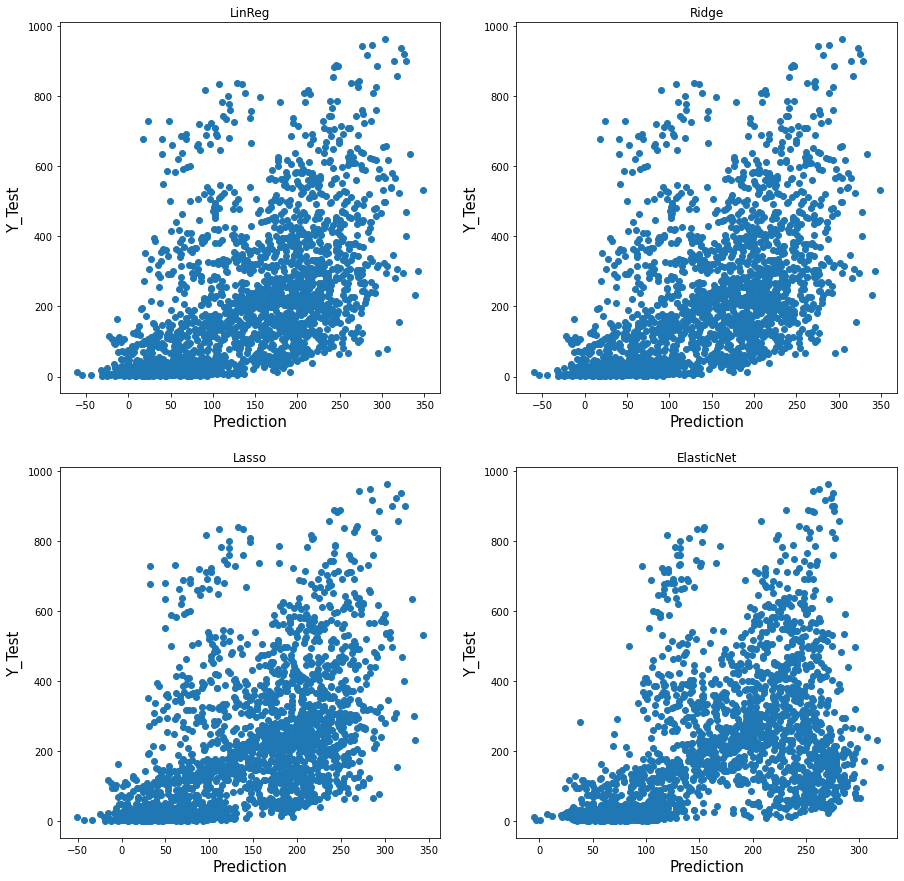

In [66]:
fig, axes = plt.subplots(2,2, figsize=(15,15))

for ax,algo in zip(axes.ravel(),algos):
    ax.scatter(reg_dict[algo]["predictions"], y_test)
    ax.set_title(algo)
    ax.set_xlabel("Prediction" , fontsize = 15)
    ax.set_ylabel("Y_Test" , fontsize = 15)

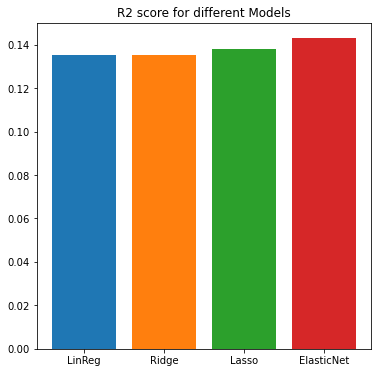

In [67]:
fig, ax = plt.subplots(figsize = (6,6))

for algo, algo_dict in reg_dict.items():
    ax.bar(algo, algo_dict["r2_score"], label = algo)
    ax.legend
    ax.set_title("R2 score for different Models")

#### Doesn't look too good so far!

<a id='3.1.b'></a>
###         3.1.b - Linear Regression with New Variables


In [68]:
# now we go again but using our pipe-object in the for-loop to fill our lin-regression models dictionary with results
# using train & test split that was set up at the end of feature engineering step:
reg_dict_2 = {
    "LinReg": {
        "algorithm": LinearRegression(),
        },
    "Ridge": {
        "algorithm": Ridge(),
    },
    "Lasso": {
        "algorithm": Lasso(),
    },
    "ElasticNet": {
        "algorithm": ElasticNet(l1_ratio=0.9, max_iter=3000),
    }
}

for algo, algo_dict in reg_dict_2.items():
    pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", algo_dict["algorithm"])])
    pipe.fit(x_train, y_train)
    algo_dict["train_predictions"] = pipe.predict(x_train)
    algo_dict["train_residuals"] = y_train - algo_dict["train_predictions"]
    algo_dict["train_r2_score"] = r2_score(y_train, algo_dict["train_predictions"])
    algo_dict["weights"] = reg.coef_
    algo_dict["intercept"] = reg.intercept_
    algo_dict["predictions"] = pipe.predict(x_test)
    algo_dict["residuals"] = y_test - algo_dict["predictions"]
    algo_dict["mse"] = mean_squared_error(y_test, algo_dict["predictions"])
    algo_dict["r2_score"] = r2_score(y_test, algo_dict["predictions"])

In [69]:
# let's have a look at our performance 
algos = ["LinReg","Ridge","Lasso","ElasticNet"]
for algo in algos:
    a = round(reg_dict_2[algo]["train_r2_score"],2)
    b = round(reg_dict_2[algo]["r2_score"],2)
    print(f"{algo} with R2-Score on train-data: {a} & R2-Score on test-data: {b}")

LinReg with R2-Score on train-data: 0.55 & R2-Score on test-data: 0.49
Ridge with R2-Score on train-data: 0.55 & R2-Score on test-data: 0.49
Lasso with R2-Score on train-data: 0.55 & R2-Score on test-data: 0.48
ElasticNet with R2-Score on train-data: 0.49 & R2-Score on test-data: 0.4


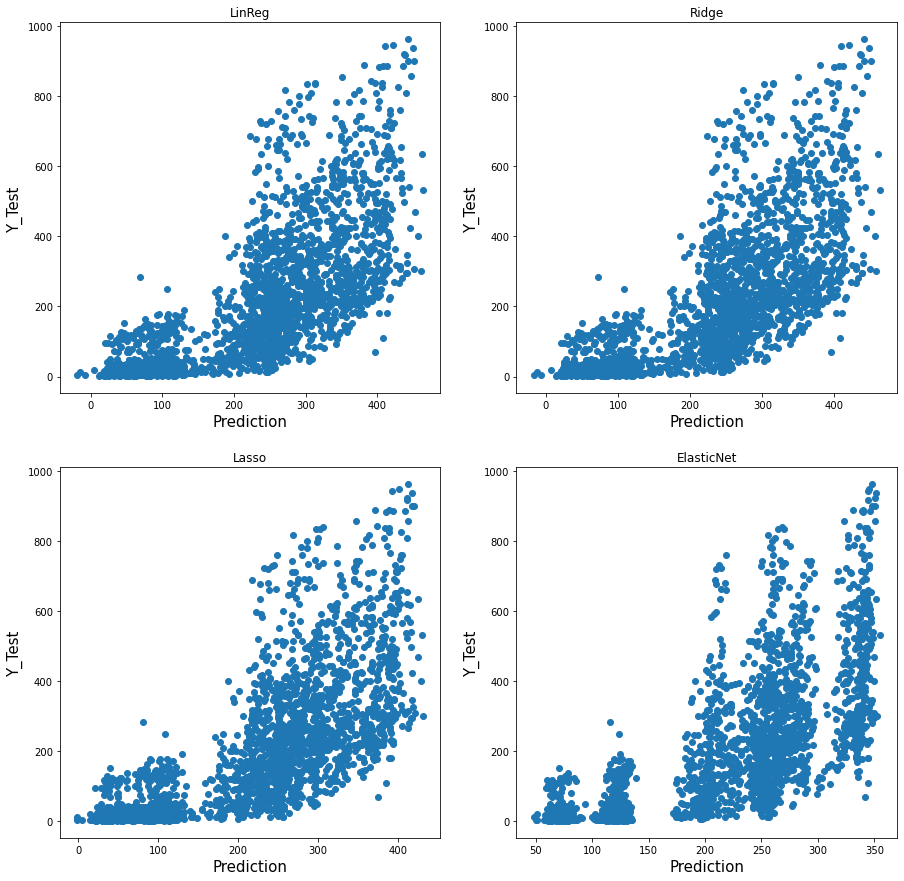

In [70]:
fig, axes = plt.subplots(2,2, figsize=(15,15))

for ax,algo in zip(axes.ravel(),algos):
    ax.scatter(reg_dict_2[algo]["predictions"], y_test)
    ax.set_title(algo)
    ax.set_xlabel("Prediction" , fontsize = 15)
    ax.set_ylabel("Y_Test" , fontsize = 15)

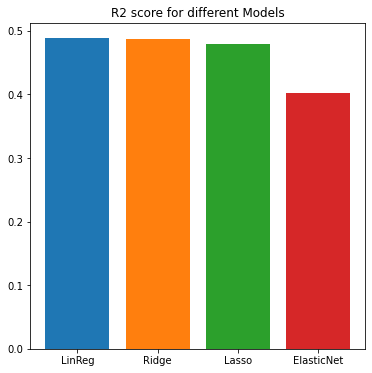

In [71]:
fig, ax = plt.subplots(figsize = (6,6))

for algo, algo_dict in reg_dict_2.items():
    ax.bar(algo, algo_dict["r2_score"], label = algo)
    ax.legend
    ax.set_title("R2 score for different Models")

#### We improved the model a lot already!

<a id='3.1.c'></a>
###         3.1.c - Baseline Random Forest

In [72]:
# Let's see what happens with a random forest regressor model
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("rf", RandomForestRegressor(random_state=42))
    ]
)

In [73]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['day_period', 'weekend',
                                                   'season']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   Pipeline(steps=[('ffillimputer',
                                                                                    ffillImputer()),
                                                                                   ('minmaxscaler',
                                      

In [74]:
# predict on x_test
y_hat = pipe.predict(x_test)

r2 = r2_score(y_test, y_hat)
print(round(r2,2)) 

0.83


#### Random forests are pretty strong out-of-the-box and using our preprocessor! Let's see if we can improve even further

<a id='3.2'></a>
## 3.2. Tuning model parameters with validation

In [75]:
# let's do a gridsearch and check for the best parameters: 


param_grid = {
    "rf__n_estimators": [150,200,300], 
    "rf__max_features": [0.8, 0.9],
    "rf__max_depth": [None],
    "rf__min_samples_split": [2,5,10],
    "rf__min_samples_leaf": [1,5,10],
}

grid = GridSearchCV(
    pipe,
    param_grid,
    scoring="r2",
    cv=3,
    n_jobs=-1, 
    verbose=1
)

grid.fit(x_train, y_train)
grid.best_score_, grid.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


(0.7008779146268905,
 {'rf__max_depth': None,
  'rf__max_features': 0.8,
  'rf__min_samples_leaf': 1,
  'rf__min_samples_split': 5,
  'rf__n_estimators': 300})

In [76]:
# trying a "single" rf with best parameters found in gridsearch and predicting on test

grid_best_params = grid.best_params_

pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("rf", RandomForestRegressor(n_estimators=grid_best_params["rf__n_estimators"],
                                     max_depth =grid_best_params["rf__max_depth"],
                                     min_samples_split = grid_best_params["rf__min_samples_split"],
                                     min_samples_leaf=grid_best_params["rf__min_samples_leaf"],
                                     max_features=grid_best_params["rf__max_features"],
                                     random_state=42))
    ]
)

pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['day_period', 'weekend',
                                                   'season']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   Pipeline(steps=[('ffillimputer',
                                                                                    ffillImputer()),
                                                                                   ('minmaxscaler',
                                      

<a id='3.3'></a>
## 3.3. Obtaining accurate predictions in test

In [77]:
# predict on x_test
y_hat = pipe.predict(x_test)

r2 = r2_score(y_test, y_hat)
print(r2) 

0.8443929121758237


<a id='3.4'></a>
## 3.4. Plotting predictions vs reality for additional insights

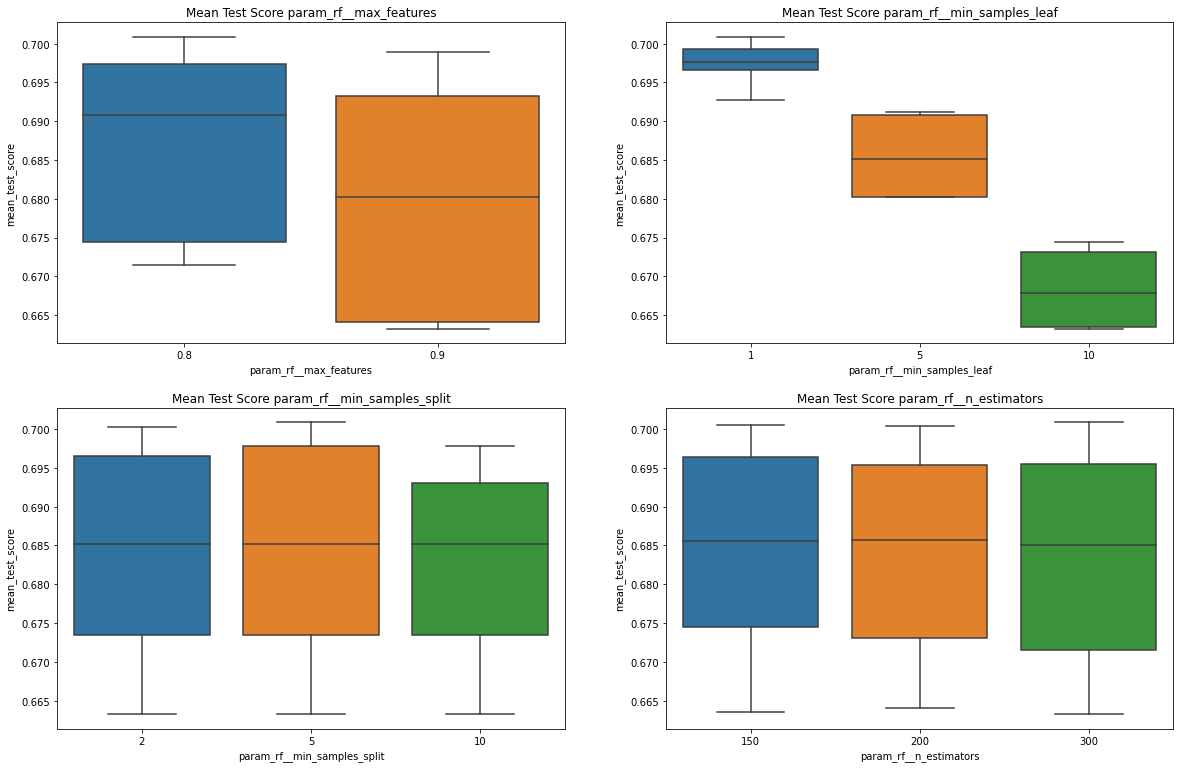

In [78]:
results = pd.DataFrame(grid.cv_results_)
results.head()

best_par = ["param_rf__max_features", "param_rf__min_samples_leaf", "param_rf__min_samples_split", "param_rf__n_estimators"]
fig, axes = plt.subplots(2,2, figsize = (20, 13))
for par, ax in zip (best_par, axes.ravel()):
    
    sns.boxplot(x= results[par], y = results["mean_test_score"], ax=ax).set(title=f"Mean Test Score {par}")

Text(0, 0.5, 'Y_Test')

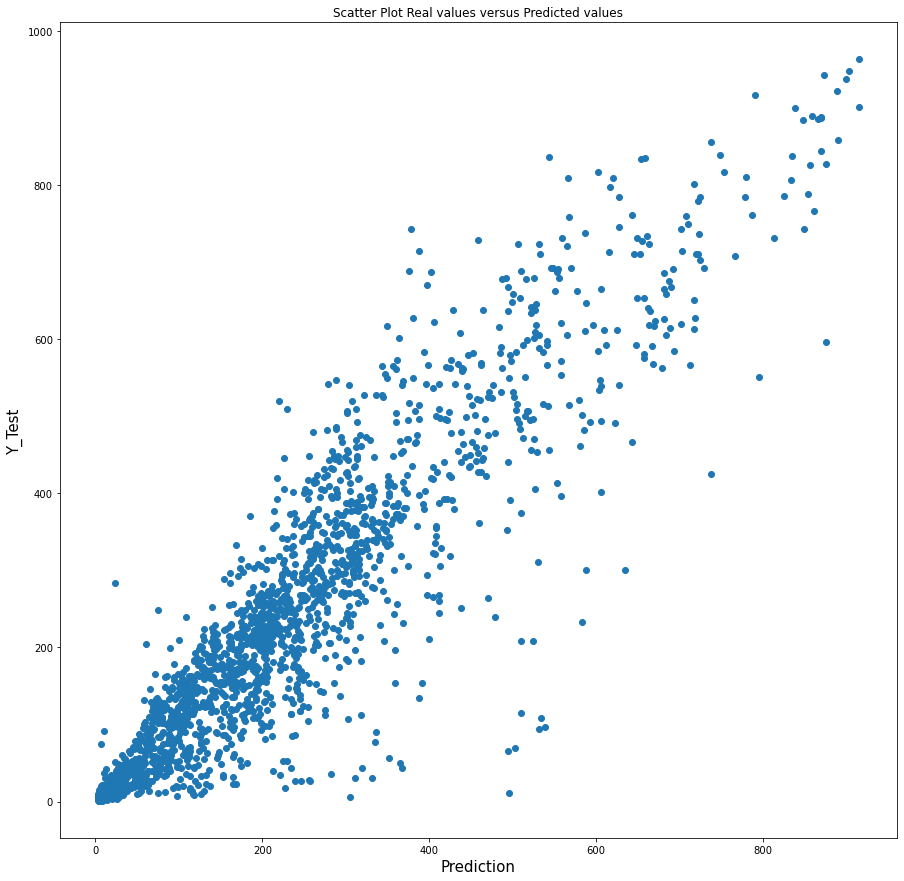

In [79]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(y_hat, y_test)
ax.set_title("Scatter Plot Real values versus Predicted values")
ax.set_xlabel("Prediction" , fontsize = 15)
ax.set_ylabel("Y_Test" , fontsize = 15)